## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("data/archive.zip")

In [3]:
grouped = df.groupby(['Club'])
# for name, group in grouped:
#     print(name)

In [4]:
top_teams = grouped.sum().sort_values(['Goals','Assists'],ascending=False).index.tolist()[:5]
# top_teams

In [5]:
top_n = 5

teams = []
for top_team in top_teams:
    team = grouped.get_group(top_team)
    team = team.sort_values(['Goals','Assists'],ascending=False)
    
    players = []
    
    rest = team['Goals'].iloc[top_n:].sum()
    players.append(('Others', rest))
    
    for i in range(top_n):
        player = team.iloc[i]
        name = player['Name'].split()[-1]
        goal = player['Goals']
        players.append((name, goal))
        
    teams.append(players)

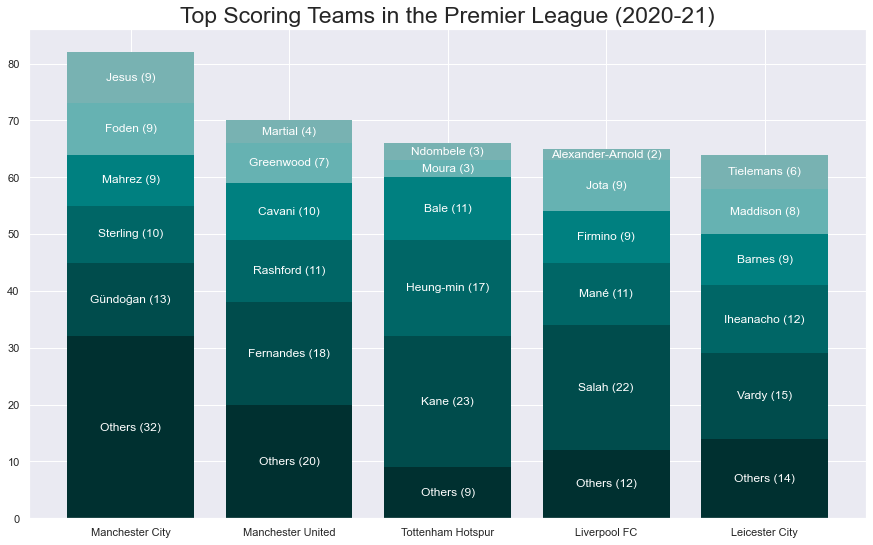

In [6]:
len(teams)

team_goals = []
team_players = []
for team in teams:
    names, goals = list(zip(*team))
    team_goals.append(goals)
    team_players.append(names)    
    
plot_steps = list(zip(*team_goals))
team_players = list(zip(*team_players))

plot_labels = []
for goals, players in zip(plot_steps, team_players):
    plot_label = []
    for goal, player in zip(goals, players):
        plot_label.append(f'{player} ({goal})')
    plot_labels.append(plot_label)

prev_goals = (0,)*(top_n)
colors = list(reversed(['#78b2b2', '#66b2b2', '#008080', '#006666', '#004c4c', '#003030']))
plt.figure(figsize=(15, 9))
for i, plot_step in enumerate(plot_steps):
    p = plt.bar([1,2,3,4,5],plot_step, bottom=prev_goals, color=colors[i], linewidth=0)
    prev_goals = [sum(x) for x in zip(prev_goals, plot_step)]

plt.xticks((1, 2, 3, 4, 5), top_teams)

ax = plt.gca()
for players, c in zip(plot_labels, ax.containers):
    ax.bar_label(c, label_type='center', color='white', labels=players)

plt.title('Top Scoring Teams in the Premier League (2020-21)', fontsize=23)
plt.show()

_________________________________________________________________

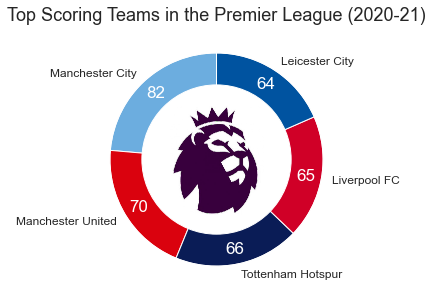

In [7]:
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Data Preprocessing
gp = grouped.sum().sort_values(['Goals','Assists'],ascending=False)['Goals']  #.index.tolist()
gp = gp[:5]
goals = gp.values.tolist()

colors=['#6caddf', '#da020e', '#0a1c56', '#d00027', '#0053a0']


# Creating figure and pie chart
fig, ax = plt.subplots(figsize=(5.5, 5.5))

patches,_, autotexts = plt.pie(goals, labels=gp.index.tolist(), 
                         colors=colors, 
                         autopct=lambda p: f'{round(p*sum(goals)/100)}',
                         textprops={'fontsize': 12}, startangle=90)

# Adjusting text position, colour, and size
for patch, txt in zip(patches, autotexts):
    
    ang = (patch.theta2 + patch.theta1) / 2.
    
    x = patch.r * 0.85 * np.cos(ang*np.pi/180)
    y = patch.r * 0.85 * np.sin(ang*np.pi/180)
    
    txt.set_position((x, y))
    txt.set_color('white')
    txt.set_fontsize(17)


# Make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

# Add the premier league logo in the middle
im = plt.imread("data/pl.png", format='png')
path = centre_circle.get_path()
patch = PathPatch(path, facecolor='none')
ax.add_patch(patch)
imagebox = OffsetImage(im, zoom=0.5, clip_path=patch, zorder=-10)
ab = AnnotationBbox(imagebox, (0,0), xycoords='data', pad=0, frameon=False)
ax.add_artist(ab)

# Show
plt.title('Top Scoring Teams in the Premier League (2020-21)', fontsize=18)
plt.tight_layout()
plt.show()

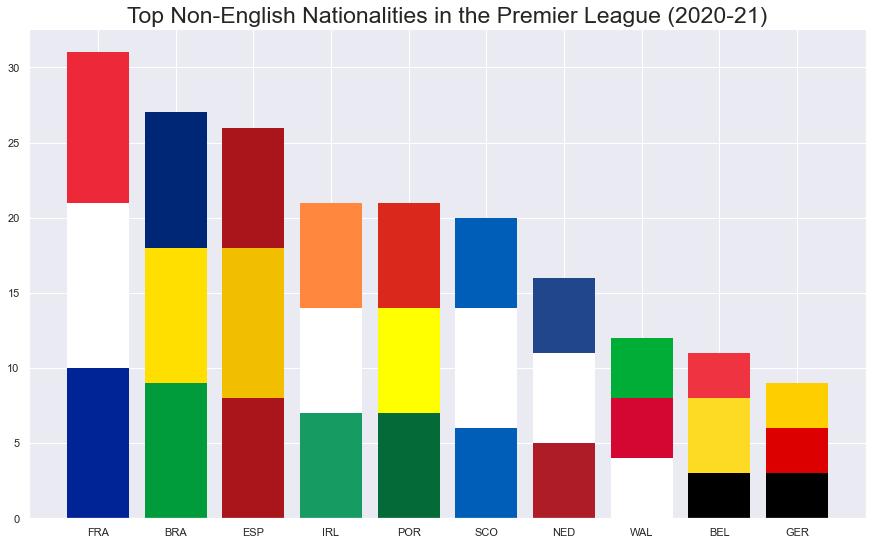

In [9]:
from itertools import zip_longest

nationality = df.groupby('Nationality').count().sort_values(['Goals'], ascending=False)[1:11].iloc[:,0]
# nationality.plot(kind='bar')

def bin_number(number, bins):
    rem  = number % bins
    number -= rem 
    step = number//bins
        
    return (step, step+rem) + (step,)*(bins-2)

nat_clrs ={
'FRA': ['#002395', '#ffffff', '#ed2939'],
'BRA': ['#009c3b', '#ffdf00', '#002776'],
'ESP': ['#aa151b', '#f1bf00', '#aa151b'],
'IRL': ['#169b62', '#ffffff', '#ff883e'],
'POR': ['#046a38', '#ffff00', '#da291c'],
'SCO': ['#005eb8', '#ffffff', '#005eb8'],
'NED': ['#ae1c28', '#ffffff', '#21468b'],
'WAL': ['#ffffff', '#d30731', '#00ad36'],
'BEL': ['#000000', '#fdda24', '#ef3340'],
'GER': ['#000000', '#dd0000', '#ffce00']}

ctry_bins = []
ctry_clrs = []
for n in nationality.iteritems():
#     print(f'{n[0]}: {bin_number(n[1], 3)}')
    bins = bin_number(n[1], len(nat_clrs[n[0]]))
    clrs = nat_clrs[n[0]]
    
    ctry_bins.append(bins)
    ctry_clrs.append(clrs)

ctry_bins = zip_longest(*ctry_bins, fillvalue=0)
ctry_clrs = list(zip_longest(*ctry_clrs, fillvalue='#000000'))


prev_goals = (0,)*(10)

plt.figure(figsize=(15, 9))
for i, plot_step in enumerate(ctry_bins):
    p = plt.bar(range(10),plot_step, bottom=prev_goals, color=ctry_clrs[i], linewidth=0)
    prev_goals = [sum(x) for x in zip(prev_goals, plot_step)]

plt.xticks(range(10), nationality.index.tolist())
plt.title('Top Non-English Nationalities in the Premier League (2020-21)', fontsize=23)
# plt.gcf().suptitle('Top 10 Non-English Nationalities in the Premier League', )
plt.show()
# ax = plt.gca()
# for players, c in zip(plot_labels, ax.containers):
#     ax.bar_label(c, label_type='center', color='white', labels=players)

In [10]:
# from matplotlib.patches import PathPatch
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# gp = grouped.sum().sort_values(['Goals','Assists'],ascending=False)['Goals']  #.index.tolist()
# gp = gp[:5]
# print(gp.index.tolist())
# colors=['#6caddf', '#da020e', '#0a1c56', '#d00027', '#0053a0', '#0a1c56']

# fig, ax = plt.subplots(figsize=(5.5, 5.5))
# # fig.set_facecolor('#3d0042')
# # def autopct_cb(values):
# #     def my_autopct(pct):
# #         total = sum(values)
# #         val = int(round(pct*total/100.0))
# #         return f'{val}'
# # #         return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
# #     return my_autopct

# goals = gp.values.tolist()
# patches,_, autotexts = plt.pie(goals, labels=gp.index.tolist(), 
#                          colors=colors, 
#                          autopct=lambda p: f'{round(p*sum(goals)/100)}',
#                          textprops={'fontsize': 12}, startangle=90)

# ax.xaxis.label.set_size(20)
# ax.yaxis.label.set_size(20)

# for patch, txt in zip(patches, autotexts):
    
#     ang = (patch.theta2 + patch.theta1) / 2.
    
#     x = patch.r * 0.85 * np.cos(ang*np.pi/180)
#     y = patch.r * 0.85 * np.sin(ang*np.pi/180)
    
#     txt.set_position((x, y))
#     txt.set_color('white')
#     txt.set_fontsize(17)
    
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# print(f"tmp: {type(centre_circle)}")
# ax.add_artist(centre_circle)

# # img = plt.imread("pl2.jpg")
# # print(img.shape)
# # plt.imshow(img)
# #########################
# im = plt.imread("pl.png", format='png')
# path = centre_circle.get_path()
# patch = PathPatch(path, facecolor='none')
# ax.add_patch(patch)
# imagebox = OffsetImage(im, zoom=0.5, clip_path=patch, zorder=-10)
# ab = AnnotationBbox(imagebox, (0,0), xycoords='data', pad=0, frameon=False)
# ax.add_artist(ab)
# #########################
# plt.tight_layout()

# plt.show()